## 13.2  함수를 사용해 핫플레이스 프로젝트 작성하기
#### 13.2.1  함수로 재구성하기
#### 13.2.2  함수 작성하기

In [1]:
import csv 

def file_open() :
    # 1-1. 인구 데이터 파일 읽기
    f = open('LOCAL_PEOPLE_DONG_201912.csv', encoding = 'utf8')
    data = csv.reader(f)
    next(data)
    data = list(data)

    # 1-2. 행정동 코드 파일 읽기
    f2 = open('dong_code.csv', encoding = 'utf8')
    code_data = csv.reader(f2)
    next(code_data)
    next(code_data)
    code_data = list(code_data)
    
    # 1-3. 데이터타입 변환하기 : 문자 --> 숫자
    # 인구데이터의 변환하기
    for row in data : 
        for i in range(1, 32) : 
            if i <= 2 : 
                row[i] = int(row[i])
            else : 
                row[i] = float(row[i])
    
    # 행정동 코드의 변환하기
    for row in code_data : 
        row[1] = int(row[1])
                
    return data, code_data

In [2]:
def dong_search(dong_name) : 
    for row in code_data : 
        if row[-1] == dong_name : 
            code = row[1]  
            
    print(dong_name,'-',code,'를 분석합니다!')   
    return code

In [3]:
import matplotlib.pyplot as plt

def graph_plot(popu_list, label_list, graph_title) :
    plt.figure(dpi=150)
    plt.rc('font', family='Malgun Gothic')
    plt.title(graph_title)    
    for i in range(len(popu_list)) : 
        plt.plot(range(24), popu_list[i], label = label_list[i])
    plt.legend()
    plt.xlabel('시간대')
    plt.ylabel('평균인구수')
    plt.xticks(range(24), range(24))
    plt.show()

In [13]:
def analysis1(dong_name, dong_code) : 
    # 3-1. 입력된 행정동의 시간대별 평균인구 구하기
    population = [0 for i in range(24)]
    for row in data : 
        if row[2] == dong_code : 
            time, p = row[1], row[3]
            population[time] += p
    population = [p/31 for p in population]
    
    # 3-2. 3-1에서 구한 평균인구 리스트로 꺾은선 그래프 그리기
    population = [population]
    labels = ['평균인구']
    title  = dong_name+' 시간대별 평균인구'
    graph_plot(popu_list= population, label_list= labels, graph_title= title)

In [5]:
data, code_data = file_open()

핫플레이스가 위치한 행정동을 입력하세요 --> 압구정동
압구정동 - 11680545 를 분석합니다!


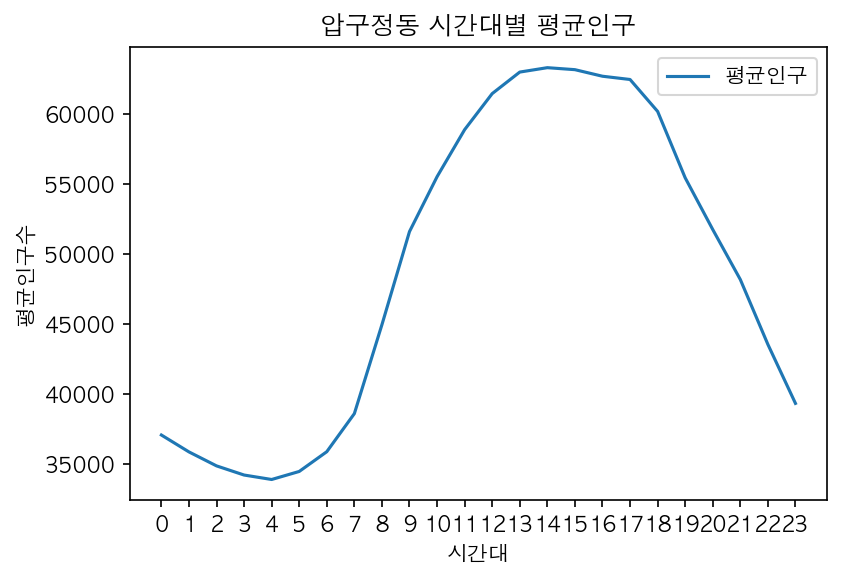

In [14]:
input_name = input('핫플레이스가 위치한 행정동을 입력하세요 --> ')
input_code = dong_search(input_name)

analysis1(dong_name= input_name, dong_code= input_code)

In [15]:
import datetime

def analysis2(dong_name, dong_code) : 
    # 4-1. 입력된 행정동의 주중/주말 시간대별 평균인구 구하기
    weekday = [0 for i in range(24)]
    weekend = [0 for i in range(24)]
    
    for row in data : 
        if row[2] == dong_code : 
            time, p = row[1], row[3]
            year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
            num = datetime.date(year, mon, day).weekday()
            if num < 5 : 
                weekday[time] += p
            else : 
                weekend[time] += p
    
    weekday_cnt, weekend_cnt = 0,0
    for i in range(1, 32) : 
        if datetime.date(2019,12,i).weekday() < 5 :
            weekday_cnt += 1
        else :
            weekend_cnt += 1

    weekday = [w/weekday_cnt for w in weekday]
    weekend = [w/weekend_cnt for w in weekend]

    # 4-2. 4-1에서 구한 평균인구 리스트로 꺾은선 그래프 그리기
    data_set = [weekday, weekend]
    labels = ['평일', '주말']
    title = dong_name + ' 주중/주말 시간대별 평균인구'
    graph_plot(popu_list= data_set, label_list= labels, graph_title= title)  

핫플레이스가 위치한 행정동을 입력하세요 : 압구정동
압구정동 - 11680545 를 분석합니다!


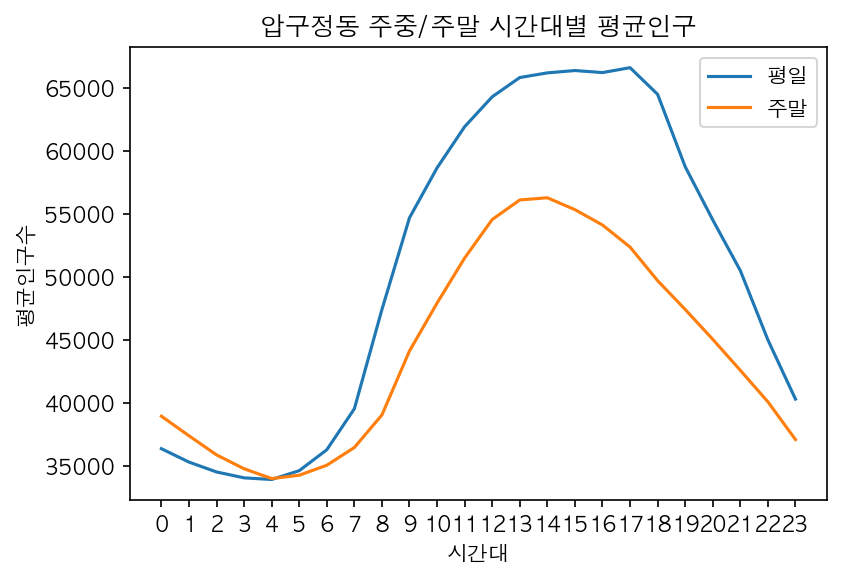

In [16]:
# data, code_data = file_open()
input_name = input('핫플레이스가 위치한 행정동을 입력하세요 : ')
input_code = dong_search(input_name)

# analysis1(dong_name= input_name, dong_code= input_code)
analysis2(dong_name= input_name, dong_code= input_code)

In [17]:
def analysis3(dong_name, dong_code) : 
    # 5-1. 입력된 행정동의 남녀 시간대별 평균인구 구하기
    male = [0 for i in range(24)]
    female = [0 for i in range(24)]

    for row in data : 
        if row[2] == dong_code : 
            time = row[1]
            male[time] += sum(row[4:18])     # 남성 인구 총합 구하기  
            female[time] += sum(row[18:32])   # 여성 인구 총합 구하기

    male = [m/31 for m in male]
    female = [f/31 for f in female]
    
    # 5-2. 5-1에서 구한 평균인구 리스트로 꺾은선 그래프 그리기
    data_set = [male, female]
    labels = ['남성','여성']
    title = dong_name+' 남녀 시간대별 평균인구'
    graph_plot(popu_list=data_set, label_list=labels, graph_title=title)

핫플레이스가 위치한 행정동을 입력하세요 : 압구정동
압구정동 - 11680545 를 분석합니다!


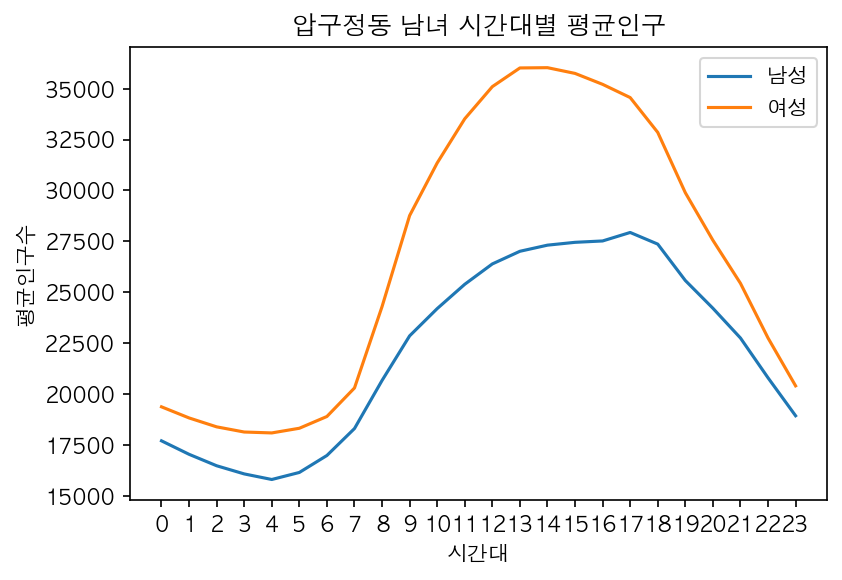

In [18]:
# data, code_data = file_open()
input_name = input('핫플레이스가 위치한 행정동을 입력하세요 : ')
input_code = dong_search(input_name)

# analysis1(dong_name= input_name, dong_code= input_code)
# analysis2(dong_name= input_name, dong_code= input_code)
analysis3(dong_name= input_name, dong_code= input_code)

In [19]:
# graph_yn 매개변수 추가 : 그래프 그리기가 필요하면 y, 필요하지 않으면 n
def analysis1(dong_name, dong_code, graph_yn = 'y') : 
    # 3-1. 입력된 행정동의 시간대별 평균인구 구하기
    population = [0 for i in range(24)]
    for row in data : 
        if row[2] == dong_code : 
            time, p = row[1], row[3]
            population[time] += p
    population = [p/31 for p in population]
    
    # 그래프를 그리지 않는 경우 인구 리스트만 반환하고 종료
    if graph_yn == 'n' : 
        return population
    
    # 3-2. 3-1에서 구한 평균인구 리스트로 꺾은선 그래프 그리기
    population = [population]
    labels = ['평균인구']
    title  = dong_name+'  시간대별 평균인구'
    graph_plot(popu_list= population, label_list= labels, graph_title= title)

In [20]:
def analysis4(dong_name1, dong_code1) :   
    # 6-1. 비교할 지역을 입력받아 행정동코드 알아내기
    dong_name2 = input('비교할 행정동을 입력하세요 --> ')
    dong_code2 = dong_search(dong_name2)
    
    # 6-2. 두 지역의 시간대별 평균인구 구하기
    population1 = analysis1(dong_name=dong_name1, dong_code=dong_code1, graph_yn='n')
    population2 = analysis1(dong_name=dong_name2, dong_code=dong_code2, graph_yn='n')
    
    # 6-3. 6-2에서 구한 평균인구 리스트로 꺾은선 그랲 ㅡ그리기
    data_set = [population1, population2]
    labels = [dong_name1, dong_name2]
    title = dong_name1+'/'+dong_name2+' 시간대별 평균인구'
    graph_plot(popu_list= data_set, label_list=labels, graph_title=title)    

핫플레이스가 위치한 행정동을 입력하세요 : 압구정동
압구정동 - 11680545 를 분석합니다!
비교할 행정동을 입력하세요 --> 역삼2동
역삼2동 - 11680650 를 분석합니다!


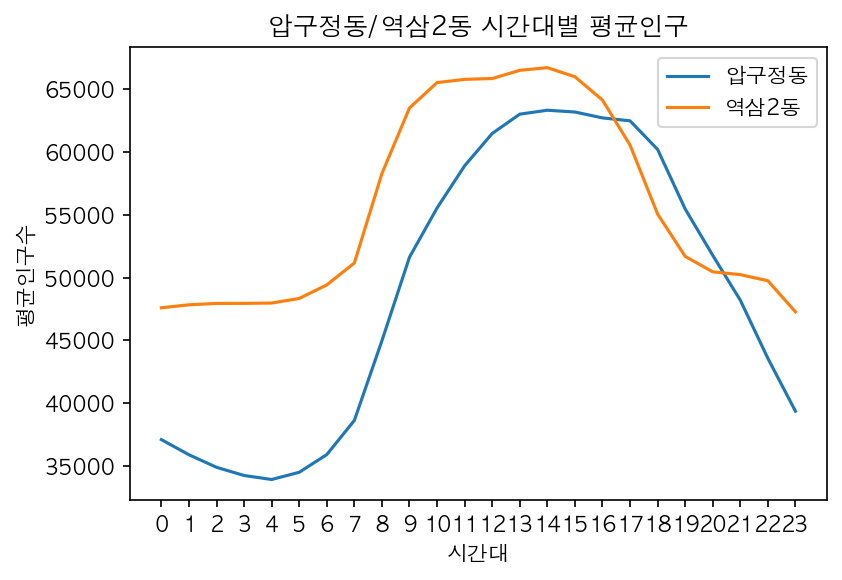

In [21]:
# data, code_data = file_open()
input_name = input('핫플레이스가 위치한 행정동을 입력하세요 : ')
input_code = dong_search(input_name)

# analysis1(dong_name= input_name, dong_code= input_code)
# analysis2(dong_name= input_name, dong_code= input_code)
# analysis3(dong_name= input_name, dong_code= input_code)
analysis4(dong_name1= input_name, dong_code1= input_code)

핫플레이스, 언제 가야 가장 덜 붐빌까?
핫플레이스가 위치한 행정동을 입력하세요 => 여의동
여의동 - 11560540 를 분석합니다!
1. 시간대별 평균인구는 어떻게 될까?
2. 평일에 가야할까, 주말에 가야할까?
3. 남자가 많을까, 여자가 많을까?
4. 내가 익숙한 지역과 비교하면 얼마나 붐빌까?
분석하고 싶은 내용의 번호를 입력해 주세요 --> 3


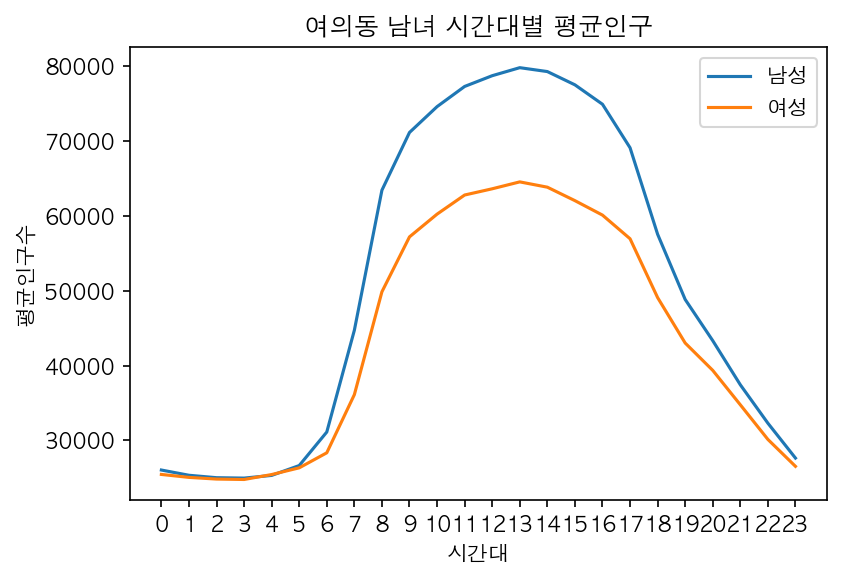

In [22]:
# data, code_data = file_open()

print('핫플레이스, 언제 가야 가장 덜 붐빌까?')

# 핫플레이스가 있는 행정동 입력받기
input_name = input('핫플레이스가 위치한 행정동을 입력하세요 => ')
input_code = dong_search(input_name)

print('1. 시간대별 평균인구는 어떻게 될까?')
print('2. 평일에 가야할까, 주말에 가야할까?')
print('3. 남자가 많을까, 여자가 많을까?')
print('4. 내가 익숙한 지역과 비교하면 얼마나 붐빌까?')

selection = int(input('분석하고 싶은 내용의 번호를 입력해 주세요 --> '))
if selection == 1 : 
    analysis1(dong_name= input_name, dong_code= input_code)
elif selection == 2 : 
    analysis2(dong_name= input_name, dong_code= input_code)
elif selection == 3 : 
    analysis3(dong_name= input_name, dong_code= input_code)
elif selection == 4 : 
    analysis4(dong_name1= input_name, dong_code1= input_code)
else : 
    print('잘못된 입력입니다.')


#### Self Check

In [23]:
# 1번
def gugudan(dan) :
    for i in range(1, 10) :
        print(dan, 'x', i, '=', dan * i) 
        
dan = int(input('몇 단을 외울까요? --> '))
gugudan(dan)

몇 단을 외울까요? --> 9
9 x 1 = 9
9 x 2 = 18
9 x 3 = 27
9 x 4 = 36
9 x 5 = 45
9 x 6 = 54
9 x 7 = 63
9 x 8 = 72
9 x 9 = 81


In [24]:
# 2번
def gugudan(dan) :
    for i in range(1, 10) :
        print(dan, 'x', i, '=', dan * i)
        
for i in range(2, 10) : 
    print(i, '단 --------') 
    gugudan(i)

2 단 --------
2 x 1 = 2
2 x 2 = 4
2 x 3 = 6
2 x 4 = 8
2 x 5 = 10
2 x 6 = 12
2 x 7 = 14
2 x 8 = 16
2 x 9 = 18
3 단 --------
3 x 1 = 3
3 x 2 = 6
3 x 3 = 9
3 x 4 = 12
3 x 5 = 15
3 x 6 = 18
3 x 7 = 21
3 x 8 = 24
3 x 9 = 27
4 단 --------
4 x 1 = 4
4 x 2 = 8
4 x 3 = 12
4 x 4 = 16
4 x 5 = 20
4 x 6 = 24
4 x 7 = 28
4 x 8 = 32
4 x 9 = 36
5 단 --------
5 x 1 = 5
5 x 2 = 10
5 x 3 = 15
5 x 4 = 20
5 x 5 = 25
5 x 6 = 30
5 x 7 = 35
5 x 8 = 40
5 x 9 = 45
6 단 --------
6 x 1 = 6
6 x 2 = 12
6 x 3 = 18
6 x 4 = 24
6 x 5 = 30
6 x 6 = 36
6 x 7 = 42
6 x 8 = 48
6 x 9 = 54
7 단 --------
7 x 1 = 7
7 x 2 = 14
7 x 3 = 21
7 x 4 = 28
7 x 5 = 35
7 x 6 = 42
7 x 7 = 49
7 x 8 = 56
7 x 9 = 63
8 단 --------
8 x 1 = 8
8 x 2 = 16
8 x 3 = 24
8 x 4 = 32
8 x 5 = 40
8 x 6 = 48
8 x 7 = 56
8 x 8 = 64
8 x 9 = 72
9 단 --------
9 x 1 = 9
9 x 2 = 18
9 x 3 = 27
9 x 4 = 36
9 x 5 = 45
9 x 6 = 54
9 x 7 = 63
9 x 8 = 72
9 x 9 = 81


In [25]:
# 3번 - 방법1
def cal_grade(score) :
    if score >=80 : 
        grade ='A'
    elif score >= 40 : 
        grade = 'B'
    else : 
        grade = 'C'
    return grade

s = int(input('점수: '))
print('등급은', cal_grade(s))

점수: 85
등급은 A


In [26]:
# 3번 - 방법2
def cal_grade(score):
    if score >= 80 : 
        return 'A'
    elif score >= 40 : 
        return 'B'
    else : 
        return 'C'
    
s = int(input('점수: '))
print('등급은', cal_grade(s))  

점수: 85
등급은 A
